In [19]:
# A machine learning library used for linear regression
from sklearn.linear_model import LinearRegression
# numpy and pandas will be used for data manipulation
import numpy as np
import pandas as pd
# matplotlib will be used for visually representing our data
import matplotlib.pyplot as plt
# Quandl will be used for importing historical oil prices
!pip install Quandl
import quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
# Setting our API key
quandl.ApiConfig.api_key = 'ddbUJLRPkipeVxaqfXPS'

# Importing our data
data = quandl.get("FRED/DCOILBRENTEU", start_date="2000-01-01", end_date="2023-03-27")

In [21]:
data


,Value
Date,
2000-01-04,23.95
2000-01-05,23.72
2000-01-06,23.55
2000-01-07,23.35
2000-01-10,22.77
...,...
2022-05-17,112.89
2022-05-18,110.04
2022-05-19,113.22


<Axes: xlabel='Date', ylabel='Crude Oil Prices: Brent - Europe'>

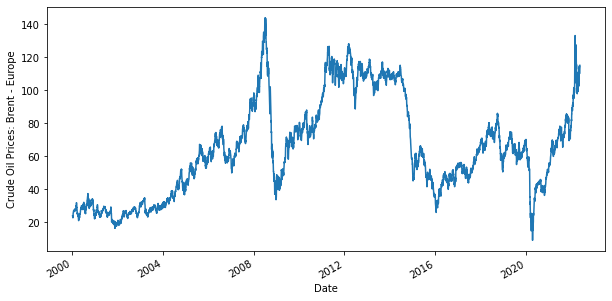

In [22]:
# Setting the text on the Y-axis
plt.ylabel("Crude Oil Prices: Brent - Europe")

# Setting the size of our graph
data.Value.plot(figsize=(10,5))

In [24]:
data['MA3'] = data['Value'].shift(1).rolling(window=3).mean()
data['MA9']= data['Value'].shift(1).rolling(window=9).mean()

In [26]:
data.head(20)

,Value,MA3,MA9
Date,,,
2000-01-04,23.95,NaN,NaN
2000-01-05,23.72,NaN,NaN
2000-01-06,23.55,NaN,NaN
2000-01-07,23.35,23.740000,NaN
2000-01-10,22.77,23.540000,NaN
2000-01-11,23.93,23.223333,NaN
2000-01-12,24.62,23.350000,NaN
2000-01-13,24.90,23.773333,NaN
2000-01-14,25.50,24.483333,NaN


In [28]:
# Dropping the NaN values
data = data.dropna()

# Initialising X and assigning the two feature variables
X = data[['MA3','MA9']]

# Getting the head of the data
X.head()

,MA3,MA9
Date,,
2000-01-17,25.006667,24.032222
2000-01-18,25.463333,24.258889
2000-01-19,25.933333,24.546667
2000-01-20,26.156667,24.837778
2000-01-21,26.246667,25.161111


In [29]:
# Setting-up the dependent variable
y = data['Value']

# Getting the head of the data
y.head()

Date
2000-01-17    25.99
2000-01-18    26.31
2000-01-19    26.17
2000-01-20    26.26
2000-01-21    27.18
Name: Value, dtype: float64

In [30]:
# Setting the training set to 80% of the data
training = 0.8
t = int(training*len(data))

# Training dataset
X_train = X[:t]
y_train = y[:t]

# Testing dataset
X_test = X[t:]
y_test = y[t:]

In [31]:
X[:t]


,MA3,MA9
Date,,
2000-01-17,25.006667,24.032222
2000-01-18,25.463333,24.258889
2000-01-19,25.933333,24.546667
2000-01-20,26.156667,24.837778
2000-01-21,26.246667,25.161111
...,...,...
2017-11-22,61.653333,62.231111
2017-11-23,62.180000,62.056667
2017-11-24,62.823333,61.936667


In [32]:
model = LinearRegression().fit(X_train,y_train)


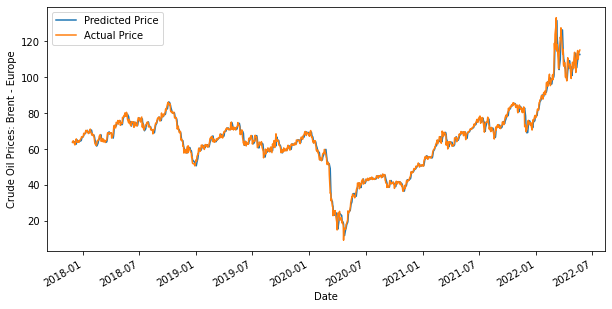

In [33]:
predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()

In [34]:
# Computing the accuracy of our model
R_squared_score =model.score(X[t:],y[t:])*100
accuracy = ("{0:.2f}".format(R_squared_score))
print ("The model has a " + accuracy + "% accuracy.")

The model has a 98.54% accuracy.


In [35]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 0.12308969987550711
betas = [ 1.2274775  -0.22922869]


In [36]:


# get the table for daily stock prices and,
# filter the table for selected tickers, columns within a time range
# set paginate to True because Quandl limits tables API to 10,000 rows per call

data1 = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT', 'WMT'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2015-12-31', 'lte': '2022-12-31' }, 
                        paginate=True)
data1

,ticker,date,adj_close
None,,,
0,WMT,2018-03-27,86.050000
1,WMT,2018-03-26,87.500000
2,WMT,2018-03-23,85.420000
3,WMT,2018-03-22,87.140000
4,WMT,2018-03-21,88.180000
...,...,...,...
1680,AAPL,2016-01-07,93.185040
1681,AAPL,2016-01-06,97.291172
1682,AAPL,2016-01-05,99.233131


In [37]:
# create a new dataframe with 'date' column as index
new = data1.set_index('date')

# use pandas pivot function to sort adj_close by tickers
clean_data = new.pivot(columns='ticker')
clean_data.head()


adj_close                      
ticker            AAPL       MSFT        WMT
date                                        
2015-12-31  101.696810  52.829107  58.379766
2016-01-04  101.783763  52.181598  58.532144
2016-01-05   99.233131  52.419653  59.922592
2016-01-06   97.291172  51.467434  60.522580
2016-01-07   93.185040  49.677262  61.932075